In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("crop_yield.csv")
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [3]:
df.shape

(19689, 10)

In [4]:
df.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

In [5]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [6]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [7]:
df["Crop"].unique()

array(['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut ', 'Cotton(lint)',
       'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta',
       'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric',
       'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander',
       'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi',
       'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower',
       'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)',
       'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth'],
      dtype=object)

In [8]:
df.drop(columns=["Crop"],inplace=True)

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:

# Assuming df is your dataframe and 'Season' is the column to encode
encoder = OneHotEncoder(sparse_output=False)
season_encoded = encoder.fit_transform(df[['Season']])

# Convert the result to a DataFrame for easier integration
season_df = pd.DataFrame(season_encoded, columns=encoder.get_feature_names_out(['Season']))

# Concatenate the one-hot encoded columns back to the original dataframe
df = pd.concat([df, season_df], axis=1)

# Optionally, drop the original 'Season' column
df.drop('Season', axis=1, inplace=True)


In [11]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

In [12]:
df.head(20)

,Crop_Year,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
0,1997,2,73814.0,56708,2051.4,7.024878e+06,22882.34,0.796087,0.0,0.0,0.0,0.0,1.0,0.0
1,1997,2,6637.0,4685,2051.4,6.316433e+05,2057.47,0.710435,0.0,1.0,0.0,0.0,0.0,0.0
2,1997,2,796.0,22,2051.4,7.575532e+04,246.76,0.238333,0.0,1.0,0.0,0.0,0.0,0.0
3,1997,2,19656.0,126905000,2051.4,1.870662e+06,6093.36,5238.051739,0.0,0.0,0.0,0.0,1.0,0.0
4,1997,2,1739.0,794,2051.4,1.655006e+05,539.09,0.420909,0.0,1.0,0.0,0.0,0.0,0.0
5,1997,2,13587.0,9073,2051.4,1.293075e+06,4211.97,0.643636,0.0,0.0,0.0,0.0,1.0,0.0
6,1997,2,2979.0,1507,2051.4,2.835114e+05,923.49,0.465455,0.0,0.0,1.0,0.0,0.0,0.0
7,1997,2,94520.0,904095,2051.4,8.995468e+06,29301.20,9.919565,0.0,1.0,0.0,0.0,0.0,0.0
8,1997,2,10098.0,5158,2051.4,9.610267e+05,3130.38,0.461364,0.0,0.0,1.0,0.0,0.0,0.0
9,1997,2,19216.0,14721,2051.4,1.828787e+06,5956.96,0.615652,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Area'] = scaler.fit_transform(df[['Area']])

In [14]:
df['Production'] = scaler.fit_transform(df[['Production']])


In [15]:
df['Annual_Rainfall'] = scaler.fit_transform(df[['Annual_Rainfall']])


In [16]:
df['Fertilizer'] = scaler.fit_transform(df[['Fertilizer']])


In [17]:
df['Pesticide'] = scaler.fit_transform(df[['Pesticide']])


In [18]:
df.head()

,Crop_Year,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
0,1997,2,-0.144802,-0.062267,0.751197,-0.179880,-0.121745,0.796087,0.0,0.0,0.0,0.0,1.0,0.0
1,1997,2,-0.236473,-0.062464,0.751197,-0.247217,-0.219385,0.710435,0.0,1.0,0.0,0.0,0.0,0.0
2,1997,2,-0.244443,-0.062482,0.751197,-0.253072,-0.227875,0.238333,0.0,1.0,0.0,0.0,0.0,0.0
3,1997,2,-0.218707,0.419954,0.751197,-0.234167,-0.200462,5238.051739,0.0,0.0,0.0,0.0,1.0,0.0
4,1997,2,-0.243157,-0.062479,0.751197,-0.252127,-0.226504,0.420909,0.0,1.0,0.0,0.0,0.0,0.0


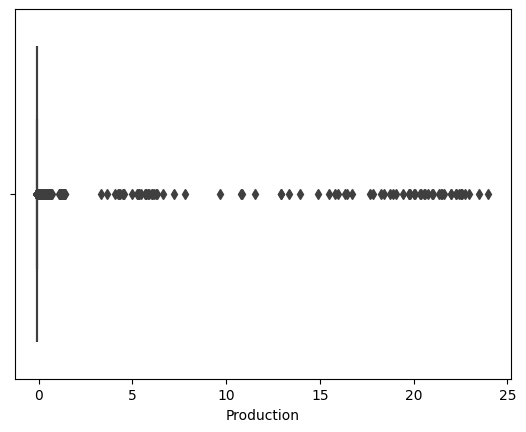

In [19]:
sns.boxplot(x=("Production"),data=df)
plt.show()

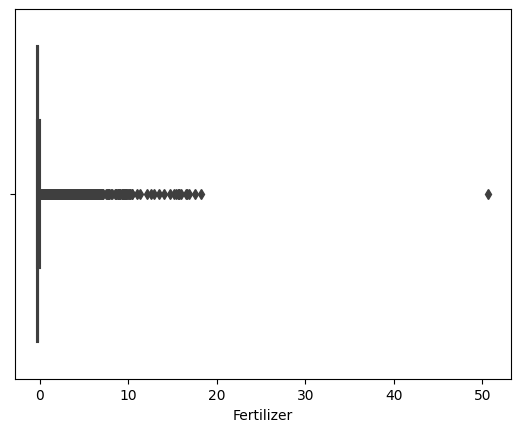

In [20]:
sns.boxplot(x=("Fertilizer"),data=df)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Yield', axis=1)
y = df['Yield']



In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']] = scaler.fit_transform(X_train[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']])
X_test[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']] = scaler.transform(X_test[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']])


NameError: name 'X_train' is not defined

In [ ]:
#from sklearn.linear_model import LinearRegression

In [ ]:
#lr=LinearRegression()
#lr.fit(X_train,y_train)

In [ ]:
#lr.score(X_test,y_test)*100

In [ ]:
#lr.predict(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Define models

models = {
    "Linear Regression": LinearRegression(),
    
    "Random Forest Regression": RandomForestRegressor(),
    
    "Decision Tree Regression": DecisionTreeRegressor(),
     
    "Gradient Boosting regression": GradientBoostingRegressor(),

   
}
# Train and evaluate each model
for name, model in models.items():
    print("="*50)
    print("Model:", name)
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    accuracy=model.score(X_train,y_train)*100
    print(y_pred)
    print(accuracy)


    

In [ ]:
#rfr = RandomForestRegressor()

In [ ]:
# #Random Forest Regressor with best parameters
# rfr = RandomForestRegressor(max_depth = 4, min_samples_leaf = 2, min_samples_split = 6, n_estimators = 100, random_state = 42)

# #fitting the model
# rfr.fit(X_train, y_train)

# #training score
# print(rfr.score(X_train, y_train))

# #prediction
# r_pred = rfr.predict(X_test)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define a parameter grid for Random Forest
# para = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#      "min_samples_leaf": [2,4,6,8],
#     "random_state": [0,42]
# }
# #Grid search object
# grid = GridSearchCV(rfr, para, cv = 5, n_jobs = -1, verbose = 1)

# #fitting the grid search object
# grid.fit(X_train, y_train)

# #best parameters
# print(grid.best_params_)


In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Predictions
# y_pred_train = rfr.predict(X_train)
# y_pred_test = rfr.predict(X_test)

# # Evaluation on training set
# print("Training MAE:", mean_absolute_error(y_train, y_pred_train))
# print("Training MSE:", mean_squared_error(y_train, y_pred_train))
# print("Training R-squared:", r2_score(y_train, y_pred_train))

# # Evaluation on testing set
# print("Testing MAE:", mean_absolute_error(y_test, y_pred_test))
# print("Testing MSE:", mean_squared_error(y_test, y_pred_test))
# print("Testing R-squared:", r2_score(y_test, y_pred_test))



In [ ]:
# plt.figure(figsize=(15,10))
# plt.subplot(1,2,1)
# plt.scatter(y_test,["random forest"]["predection"],aplha=0.5)
# plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
# plt.xlabel("actual yield")
# plt.ylabel("predicted yield")
# plt.title("decision tree: actual vs predicted")

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_evaluate_crop_yield_model(X, y, test_size=0.2, random_state=42):
    """
    Train and evaluate a Decision Tree model for crop yield prediction
    
    Parameters:
    X: Features dataset
    y: Target variable (crop yield)
    test_size: Proportion of dataset to include in the test split
    random_state: Random state for reproducibility
    """
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Define parameter grid for GridSearchCV
    param_grid = {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt']
    }
    
    # Initialize Decision Tree model
    dt = DecisionTreeRegressor(random_state=random_state)
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(
        estimator=dt,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results = {
        'best_parameters': grid_search.best_params_,
        'metrics': {
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2
        },
        'best_model': best_model
    }
    
    return results

In [ ]:
plt.subplot(1,2,1)
plt.scatter(y_test,